# Task 1

The following experiments will help convince you that the architecture choices you’ve made are all fairly reasonable, although there’s still room for improvement:

* You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.
* Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.
* Try using the ```mse``` loss function instead of ```binary_crossentropy```.
* Try using the ```tanh``` activation (an activation that was popular in the early days of neural networks) instead of relu.

In [10]:
import numpy as np
from pickle import dump, load
from keras import models
from keras import layers
from keras import optimizers

In [6]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=1000) 

17465344/17464789 [==============================] - 10s 1us/step


In [16]:
def vectorize_sequences(sequences, dimension=1000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
print(x_train.shape)
x_test = vectorize_sequences(test_data)
print(x_test.shape)

y_train = np.asarray(train_labels).astype('float32')
print(y_train.shape)
y_test = np.asarray(test_labels).astype('float32')
print(y_test.shape)

(25000, 1000)
(25000, 1000)
(25000,)
(25000,)


In [13]:
dump(x_train, open('x_train.pkl', 'wb'))
dump(x_test, open('x_test.pkl', 'wb'))

dump(y_train, open('y_train.pkl', 'wb'))
dump(y_test, open('y_test.pkl', 'wb'))

In [14]:
# я искренне верю, что экспериментировать лучше на мухах, а не на слонах, поэтому обучаемся на 9000, а не на 24)
x_val = x_train[:1000]
print(x_val.shape)
part_x_train = x_train[1000:10000]
print(part_x_train.shape)
y_val = y_train[:1000]
part_y_train = y_train[1000:10000]

(1000, 1000)
(9000, 1000)


### 1) Меняем кол-во слоёв

In [24]:
model_1 = models.Sequential()
model_1.add(layers.Dense(16, activation='relu', input_shape=(1000,)))
model_1.add(layers.Dense(1, activation='sigmoid'))

In [25]:
model_2 = models.Sequential()
model_2.add(layers.Dense(16, activation='relu', input_shape=(1000,)))
model_2.add(layers.Dense(16, activation='relu'))
model_2.add(layers.Dense(1, activation='sigmoid'))

In [26]:
model_3 = models.Sequential()
model_3.add(layers.Dense(16, activation='relu', input_shape=(1000,)))
model_3.add(layers.Dense(16, activation='relu'))
model_3.add(layers.Dense(16, activation='relu'))
model_3.add(layers.Dense(1, activation='sigmoid'))

In [38]:
# функции для визуализации красоты

import matplotlib.pyplot as plt

def vis_loss(history):
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

    epochs = range(1, len(history_dict['acc']) + 1)

    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
    
def vis_acc(history):
    history_dict = history.history
    loss_values = history_dict['acc']
    val_loss_values = history_dict['val_acc']

    epochs = range(1, len(history_dict['acc']) + 1)

    plt.plot(epochs, loss_values, 'bo', label='Training acc')
    plt.plot(epochs, val_loss_values, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


In [27]:
model_1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history_1 = model_1.fit(part_x_train,
                    part_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 9000 samples, validate on 1000 samples
Epoch 1/10
9000/9000 [==============================] - 1s 95us/step - loss: 0.6049 - acc: 0.6888 - val_loss: 0.5172 - val_acc: 0.7700
Epoch 2/10
9000/9000 [==============================] - 0s 53us/step - loss: 0.4742 - acc: 0.8044 - val_loss: 0.4469 - val_acc: 0.8100
Epoch 3/10
9000/9000 [==============================] - 0s 46us/step - loss: 0.4106 - acc: 0.8380 - val_loss: 0.4004 - val_acc: 0.8290
Epoch 4/10
9000/9000 [==============================] - 1s 56us/step - loss: 0.3702 - acc: 0.8554 - val_loss: 0.3770 - val_acc: 0.8450
Epoch 5/10
9000/9000 [==============================] - 0s 45us/step - loss: 0.3453 - acc: 0.8650 - val_loss: 0.3574 - val_acc: 0.8490
Epoch 6/10
9000/9000 [==============================] - 0s 55us/step - loss: 0.3279 - acc: 0.8704 - val_loss: 0.3656 - val_acc: 0.8430
Epoch 7/10
9000/9000 [==============================] - 0s 41us/step - loss: 0.3127 - acc: 0.8761 - val_loss: 0.3646 - val_acc: 0.8340
Epoch 8

In [28]:
model_2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history_2 = model_2.fit(part_x_train,
                    part_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 9000 samples, validate on 1000 samples
Epoch 1/10
9000/9000 [==============================] - 1s 117us/step - loss: 0.6200 - acc: 0.6594 - val_loss: 0.5320 - val_acc: 0.7610
Epoch 2/10
9000/9000 [==============================] - 0s 44us/step - loss: 0.4774 - acc: 0.7941 - val_loss: 0.4506 - val_acc: 0.8110
Epoch 3/10
9000/9000 [==============================] - 0s 50us/step - loss: 0.4052 - acc: 0.8327 - val_loss: 0.3990 - val_acc: 0.8260
Epoch 4/10
9000/9000 [==============================] - 0s 43us/step - loss: 0.3600 - acc: 0.8514 - val_loss: 0.3769 - val_acc: 0.8530
Epoch 5/10
9000/9000 [==============================] - 0s 43us/step - loss: 0.3328 - acc: 0.8647 - val_loss: 0.3577 - val_acc: 0.8520
Epoch 6/10
9000/9000 [==============================] - 0s 45us/step - loss: 0.3163 - acc: 0.8701 - val_loss: 0.3529 - val_acc: 0.8360
Epoch 7/10
9000/9000 [==============================] - 0s 43us/step - loss: 0.3047 - acc: 0.8766 - val_loss: 0.3402 - val_acc: 0.8480
Epoch 

In [29]:
model_3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history_3 = model_3.fit(part_x_train,
                    part_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 9000 samples, validate on 1000 samples
Epoch 1/10
9000/9000 [==============================] - 1s 106us/step - loss: 0.6304 - acc: 0.6663 - val_loss: 0.5384 - val_acc: 0.7760
Epoch 2/10
9000/9000 [==============================] - 0s 39us/step - loss: 0.4858 - acc: 0.7982 - val_loss: 0.4408 - val_acc: 0.8150
Epoch 3/10
9000/9000 [==============================] - 0s 40us/step - loss: 0.4035 - acc: 0.8338 - val_loss: 0.4020 - val_acc: 0.8250
Epoch 4/10
9000/9000 [==============================] - 0s 47us/step - loss: 0.3637 - acc: 0.8507 - val_loss: 0.4045 - val_acc: 0.8260
Epoch 5/10
9000/9000 [==============================] - 1s 61us/step - loss: 0.3294 - acc: 0.8671 - val_loss: 0.3649 - val_acc: 0.8320
Epoch 6/10
9000/9000 [==============================] - 0s 52us/step - loss: 0.3231 - acc: 0.8668 - val_loss: 0.3495 - val_acc: 0.8530
Epoch 7/10
9000/9000 [==============================] - 0s 46us/step - loss: 0.2987 - acc: 0.8784 - val_loss: 0.3660 - val_acc: 0.8280
Epoch 

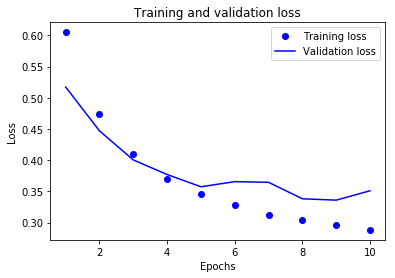

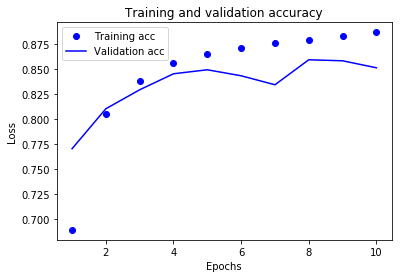

In [39]:
vis_loss(history_1)
vis_acc(histoдуry_1)

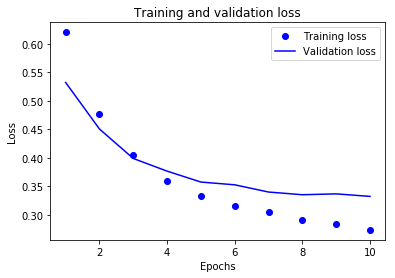

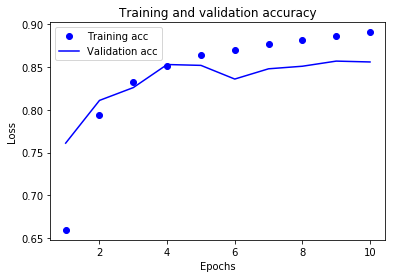

In [40]:
vis_loss(history_2)
vis_acc(history_2)

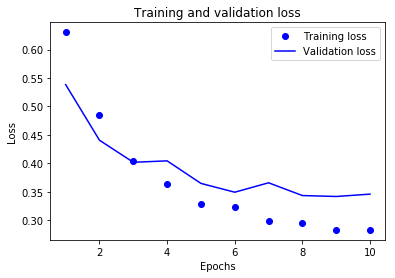

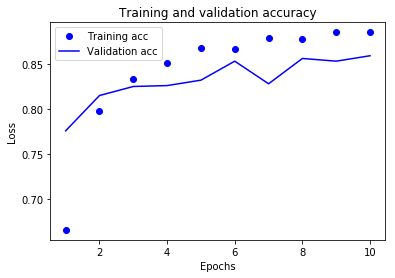

In [41]:
vis_loss(history_3)
vis_acc(history_3)

In [31]:
results_1 = model_1.evaluate(x_test, y_test)
print(results_1)
results_2 = model_2.evaluate(x_test, y_test)
print(results_2)
results_3 = model_3.evaluate(x_test, y_test)
print(results_3)

25000/25000 [==============================] - 1s 49us/step
[0.3573422158432007, 0.84736]
25000/25000 [==============================] - 1s 41us/step
[0.34291560002326965, 0.85364]
25000/25000 [==============================] - 1s 38us/step
[0.35422761123657226, 0.85024]


У нас не очень много примеров (9000), так что 3 слоя, видимо, оказалось слишком сложно, а 1 -- простовато. А ещё мы чуток переобучились на 1 слое (аж 10 эпох для простенькой модели же). С 3 тоже не пойми чего, потому что функция потерь к концу растёт, но и точность внезапно тоже куда-то вверх пошла. Зато с 2 слоями красота)

Правда, сравнивать переобученные модели с непереобученной не совсем корректно, наверное...

### 2) Меняем число нейрончиков

Остаёмся с 2 слоями.

In [43]:
model_16 = models.Sequential()
model_16.add(layers.Dense(16, activation='relu', input_shape=(1000,)))
model_16.add(layers.Dense(16, activation='relu'))
model_16.add(layers.Dense(1, activation='sigmoid'))

In [46]:
model_32 = models.Sequential()
model_32.add(layers.Dense(32, activation='relu', input_shape=(1000,)))
model_32.add(layers.Dense(32, activation='relu'))
model_32.add(layers.Dense(1, activation='sigmoid'))

In [45]:
model_64 = models.Sequential()
model_64.add(layers.Dense(64, activation='relu', input_shape=(1000,)))
model_64.add(layers.Dense(64, activation='relu'))
model_64.add(layers.Dense(1, activation='sigmoid'))

In [47]:
model_16.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history_16 = model_16.fit(part_x_train,
                    part_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 9000 samples, validate on 1000 samples
Epoch 1/10
9000/9000 [==============================] - 2s 204us/step - loss: 0.6065 - acc: 0.6872 - val_loss: 0.5198 - val_acc: 0.7840
Epoch 2/10
9000/9000 [==============================] - ETA: 0s - loss: 0.4763 - acc: 0.805 - 0s 53us/step - loss: 0.4724 - acc: 0.8071 - val_loss: 0.4297 - val_acc: 0.8350
Epoch 3/10
9000/9000 [==============================] - 1s 58us/step - loss: 0.4048 - acc: 0.8410 - val_loss: 0.4093 - val_acc: 0.8180
Epoch 4/10
9000/9000 [==============================] - 0s 54us/step - loss: 0.3634 - acc: 0.8548 - val_loss: 0.3632 - val_acc: 0.8520
Epoch 5/10
9000/9000 [==============================] - 0s 52us/step - loss: 0.3383 - acc: 0.8676 - val_loss: 0.3488 - val_acc: 0.8520
Epoch 6/10
9000/9000 [==============================] - 0s 50us/step - loss: 0.3160 - acc: 0.8728 - val_loss: 0.3387 - val_acc: 0.8520
Epoch 7/10
9000/9000 [==============================] - 0s 53us/step - loss: 0.3041 - acc: 0.8753 - val

In [48]:
model_32.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history_32 = model_32.fit(part_x_train,
                    part_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 9000 samples, validate on 1000 samples
Epoch 1/10
9000/9000 [==============================] - 1s 153us/step - loss: 0.6099 - acc: 0.6941 - val_loss: 0.5002 - val_acc: 0.7930
Epoch 2/10
9000/9000 [==============================] - 0s 52us/step - loss: 0.4574 - acc: 0.8111 - val_loss: 0.4136 - val_acc: 0.8260
Epoch 3/10
9000/9000 [==============================] - 0s 48us/step - loss: 0.3851 - acc: 0.8420 - val_loss: 0.3749 - val_acc: 0.8410
Epoch 4/10
9000/9000 [==============================] - 0s 48us/step - loss: 0.3471 - acc: 0.8569 - val_loss: 0.3872 - val_acc: 0.8380
Epoch 5/10
9000/9000 [==============================] - 0s 54us/step - loss: 0.3231 - acc: 0.8678 - val_loss: 0.3540 - val_acc: 0.8390
Epoch 6/10
9000/9000 [==============================] - 0s 50us/step - loss: 0.3122 - acc: 0.8711 - val_loss: 0.3365 - val_acc: 0.8540
Epoch 7/10
9000/9000 [==============================] - 0s 48us/step - loss: 0.2936 - acc: 0.8786 - val_loss: 0.3333 - val_acc: 0.8530
Epoch 

In [49]:
model_64.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history_64 = model_64.fit(part_x_train,
                    part_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 9000 samples, validate on 1000 samples
Epoch 1/10
9000/9000 [==============================] - 2s 204us/step - loss: 0.5881 - acc: 0.6959 - val_loss: 0.4655 - val_acc: 0.8060
Epoch 2/10
9000/9000 [==============================] - 1s 57us/step - loss: 0.4173 - acc: 0.8270 - val_loss: 0.3862 - val_acc: 0.8410
Epoch 3/10
9000/9000 [==============================] - 1s 59us/step - loss: 0.3649 - acc: 0.8466 - val_loss: 0.3617 - val_acc: 0.8470
Epoch 4/10
9000/9000 [==============================] - 0s 53us/step - loss: 0.3345 - acc: 0.8626 - val_loss: 0.4063 - val_acc: 0.8230
Epoch 5/10
9000/9000 [==============================] - 0s 48us/step - loss: 0.3147 - acc: 0.8717 - val_loss: 0.3393 - val_acc: 0.8550
Epoch 6/10
9000/9000 [==============================] - 1s 57us/step - loss: 0.2953 - acc: 0.8783 - val_loss: 0.3428 - val_acc: 0.8560
Epoch 7/10
9000/9000 [==============================] - 0s 53us/step - loss: 0.2947 - acc: 0.8800 - val_loss: 0.3686 - val_acc: 0.8440
Epoch 

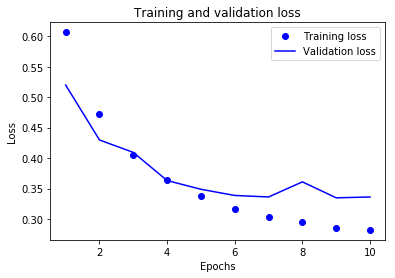

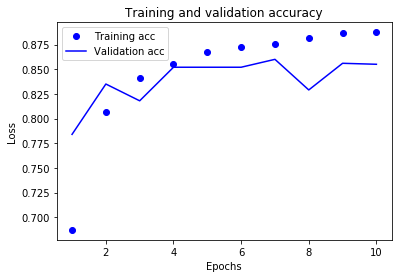

In [50]:
vis_loss(history_16)
vis_acc(history_16)

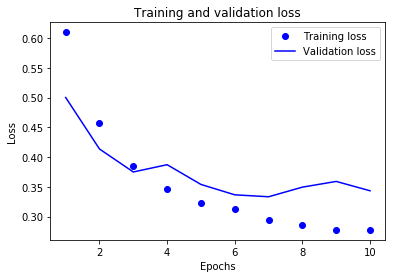

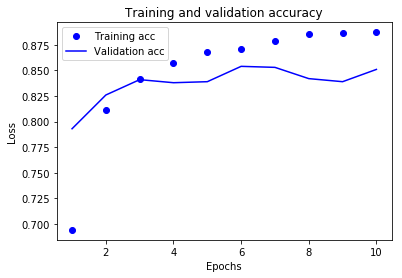

In [51]:
vis_loss(history_32)
vis_acc(history_32)

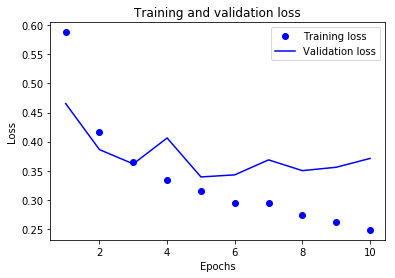

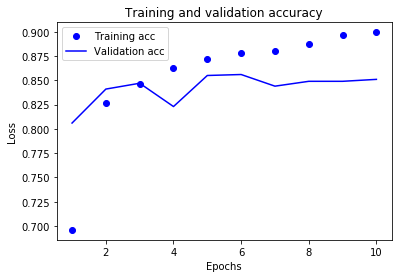

In [54]:
vis_loss(history_64)
vis_acc(history_64)

In [55]:
results_16 = model_16.evaluate(x_test, y_test)
print(results_16)
results_32 = model_32.evaluate(x_test, y_test)
print(results_2)
results_64 = model_64.evaluate(x_test, y_test)
print(results_64)

25000/25000 [==============================] - 2s 96us/step
[0.3451927107620239, 0.85212]
25000/25000 [==============================] - 2s 67us/step
[0.34291560002326965, 0.85364]
25000/25000 [==============================] - 2s 71us/step
[0.37916072536468504, 0.84396]


Очевидно, что переусложнение, как с 64 нейронами, не пошло нам на пользу: мы прям конкретно переобучились, судя по графикам. На модели с 16 нейронами у нас крохотное ухудшение, зато посередине у нас снова всё хорошо.

### 3) Сравниваем функции потерь

Оставляем 2 слоя и 32 нейрона.

In [57]:
model_entr = models.Sequential()
model_entr.add(layers.Dense(32, activation='relu', input_shape=(1000,)))
model_entr.add(layers.Dense(32, activation='relu'))
model_entr.add(layers.Dense(1, activation='sigmoid'))

In [61]:
model_mse = models.Sequential()
model_mse.add(layers.Dense(32, activation='relu', input_shape=(1000,)))
model_mse.add(layers.Dense(32, activation='relu'))
model_mse.add(layers.Dense(1, activation='sigmoid'))

In [60]:
model_entr.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history_entr = model_entr.fit(part_x_train,
                    part_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 9000 samples, validate on 1000 samples
Epoch 1/10
9000/9000 [==============================] - 2s 182us/step - loss: 0.6301 - acc: 0.6586 - val_loss: 0.5140 - val_acc: 0.7670
Epoch 2/10
9000/9000 [==============================] - 0s 43us/step - loss: 0.4673 - acc: 0.8007 - val_loss: 0.4063 - val_acc: 0.8470
Epoch 3/10
9000/9000 [==============================] - 0s 41us/step - loss: 0.3902 - acc: 0.8377 - val_loss: 0.3743 - val_acc: 0.8470
Epoch 4/10
9000/9000 [==============================] - ETA: 0s - loss: 0.3519 - acc: 0.856 - 0s 46us/step - loss: 0.3501 - acc: 0.8568 - val_loss: 0.3447 - val_acc: 0.8520
Epoch 5/10
9000/9000 [==============================] - 0s 40us/step - loss: 0.3192 - acc: 0.8679 - val_loss: 0.3525 - val_acc: 0.8420
Epoch 6/10
9000/9000 [==============================] - 0s 46us/step - loss: 0.3027 - acc: 0.8748 - val_loss: 0.3327 - val_acc: 0.8500
Epoch 7/10
9000/9000 [==============================] - 0s 51us/step - loss: 0.2878 - acc: 0.8851 - val

In [62]:
model_mse.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['acc'])

history_mse = model_entr.fit(part_x_train,
                    part_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 9000 samples, validate on 1000 samples
Epoch 1/10
9000/9000 [==============================] - 1s 81us/step - loss: 0.2568 - acc: 0.8968 - val_loss: 0.3408 - val_acc: 0.8530
Epoch 2/10
9000/9000 [==============================] - 0s 43us/step - loss: 0.2435 - acc: 0.9022 - val_loss: 0.3551 - val_acc: 0.8500
Epoch 3/10
9000/9000 [==============================] - 0s 37us/step - loss: 0.2361 - acc: 0.9067 - val_loss: 0.3545 - val_acc: 0.8550
Epoch 4/10
9000/9000 [==============================] - 0s 51us/step - loss: 0.2350 - acc: 0.9087 - val_loss: 0.3860 - val_acc: 0.8400
Epoch 5/10
9000/9000 [==============================] - 0s 45us/step - loss: 0.2224 - acc: 0.9139 - val_loss: 0.3590 - val_acc: 0.8530
Epoch 6/10
9000/9000 [==============================] - 0s 50us/step - loss: 0.2184 - acc: 0.9137 - val_loss: 0.3612 - val_acc: 0.8500
Epoch 7/10
9000/9000 [==============================] - 0s 45us/step - loss: 0.2043 - acc: 0.9238 - val_loss: 0.3738 - val_acc: 0.8460
Epoch 8

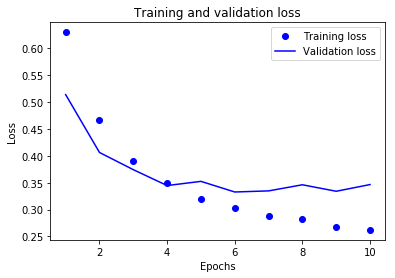

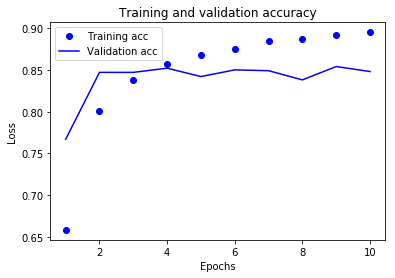

In [64]:
vis_loss(history_entr)
vis_acc(history_entr)

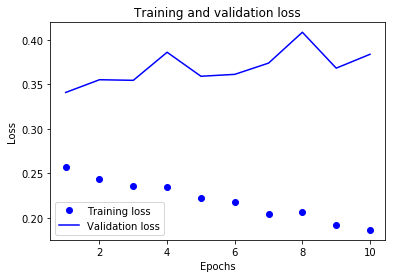

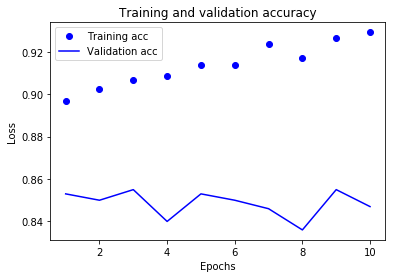

In [65]:
vis_loss(history_mse)
vis_acc(history_mse)

In [66]:
results_entr = model_entr.evaluate(x_test, y_test)
print(results_entr)
results_mse = model_mse.evaluate(x_test, y_test)
print(results_mse)

25000/25000 [==============================] - 2s 80us/step
[0.39403704946041107, 0.841]
25000/25000 [==============================] - 2s 90us/step
[0.25577033059597015, 0.49928]


Нуууу, мы применили к классификатору функцию потерь для регрессии и не получили ничего хорошего) Хотя с энтропией у нас тоже всё неровно и неопределённо.

### 4) Пробуем функции активации

In [68]:
model_relu = models.Sequential()
model_relu.add(layers.Dense(32, activation='relu', input_shape=(1000,)))
model_relu.add(layers.Dense(32, activation='relu'))
model_relu.add(layers.Dense(1, activation='sigmoid'))

In [69]:
model_tanh = models.Sequential()
model_tanh.add(layers.Dense(32, activation='tanh', input_shape=(1000,)))
model_tanh.add(layers.Dense(32, activation='tanh'))
model_tanh.add(layers.Dense(1, activation='sigmoid'))

In [70]:
model_relu.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history_relu = model_relu.fit(part_x_train,
                    part_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 9000 samples, validate on 1000 samples
Epoch 1/10
9000/9000 [==============================] - 2s 223us/step - loss: 0.6038 - acc: 0.6923 - val_loss: 0.5020 - val_acc: 0.8000
Epoch 2/10
9000/9000 [==============================] - 0s 47us/step - loss: 0.4556 - acc: 0.8111 - val_loss: 0.4219 - val_acc: 0.8280
Epoch 3/10
9000/9000 [==============================] - 0s 49us/step - loss: 0.3835 - acc: 0.8432 - val_loss: 0.3983 - val_acc: 0.8290
Epoch 4/10
9000/9000 [==============================] - 0s 48us/step - loss: 0.3491 - acc: 0.8586 - val_loss: 0.3552 - val_acc: 0.8450
Epoch 5/10
9000/9000 [==============================] - 0s 47us/step - loss: 0.3222 - acc: 0.8719 - val_loss: 0.3452 - val_acc: 0.8530
Epoch 6/10
9000/9000 [==============================] - 0s 46us/step - loss: 0.3086 - acc: 0.8731 - val_loss: 0.3570 - val_acc: 0.8480
Epoch 7/10
9000/9000 [==============================] - 0s 44us/step - loss: 0.2881 - acc: 0.8850 - val_loss: 0.3430 - val_acc: 0.8540
Epoch 

In [71]:
model_tanh.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['acc'])

history_tanh = model_entr.fit(part_x_train,
                    part_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 9000 samples, validate on 1000 samples
Epoch 1/10
9000/9000 [==============================] - 1s 148us/step - loss: 0.1668 - acc: 0.9426 - val_loss: 0.4777 - val_acc: 0.8060
Epoch 2/10
9000/9000 [==============================] - 1s 62us/step - loss: 0.1793 - acc: 0.9316 - val_loss: 0.3838 - val_acc: 0.8460
Epoch 3/10
9000/9000 [==============================] - 1s 60us/step - loss: 0.1578 - acc: 0.9443 - val_loss: 0.3939 - val_acc: 0.8410
Epoch 4/10
9000/9000 [==============================] - 0s 46us/step - loss: 0.1496 - acc: 0.9501 - val_loss: 0.4133 - val_acc: 0.8340
Epoch 5/10
9000/9000 [==============================] - 0s 47us/step - loss: 0.1421 - acc: 0.9518 - val_loss: 0.5570 - val_acc: 0.7950
Epoch 6/10
9000/9000 [==============================] - 1s 62us/step - loss: 0.1352 - acc: 0.9548 - val_loss: 0.4331 - val_acc: 0.8350
Epoch 7/10
9000/9000 [==============================] - 0s 51us/step - loss: 0.1321 - acc: 0.9546 - val_loss: 0.4054 - val_acc: 0.8470
Epoch 

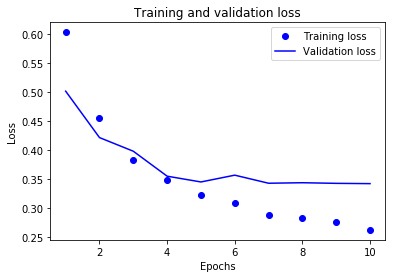

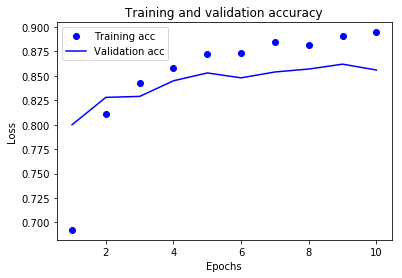

In [72]:
vis_loss(history_relu)
vis_acc(history_relu)

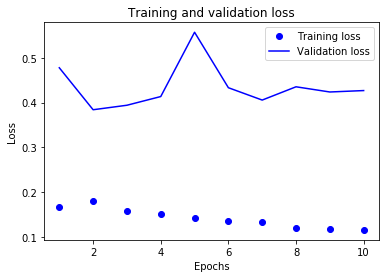

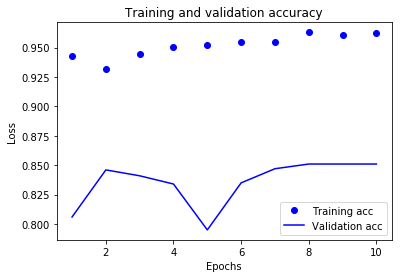

In [73]:
vis_loss(history_tanh)
vis_acc(history_tanh)

In [74]:
results_relu = model_relu.evaluate(x_test, y_test)
print(results_relu)
results_tanh = model_tanh.evaluate(x_test, y_test)
print(results_tanh)

25000/25000 [==============================] - 3s 124us/step
[0.3454198338603973, 0.8532]
25000/25000 [==============================] - 3s 103us/step
[0.2539921920967102, 0.52504]


В этом раунде победа за прогрессом)

 -------------------------


# Task 2

* Try using larger or smaller layers: 32 units, 128 units, and so on.
* You used two hidden layers. Now try using a single hidden layer, or three hidden layers.

In [89]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=1000)

In [95]:
# функцию векторизации признаков уже прописывали

from keras.utils.np_utils import to_categorical

x_train = vectorize_sequences(train_data)
print(x_train.shape)
x_test = vectorize_sequences(test_data)
print(x_test.shape)
y_train = to_categorical(train_labels)
print(y_train.shape)
y_test = to_categorical(test_labels)
print(y_test.shape)

(8982, 1000)
(2246, 1000)
(8982, 46)
(2246, 46)


In [97]:
x_val = x_train[:1000]
part_x_train = x_train[1000:]

y_val = y_train[:1000]
part_y_train = y_train[1000:]

### 1) Меняем размерность слоёв

In [100]:
model_32 = models.Sequential()
model_32.add(layers.Dense(32, activation='relu', input_shape=(1000,)))
model_32.add(layers.Dense(32, activation='relu'))
model_32.add(layers.Dense(46, activation='softmax'))

In [98]:
model_64 = models.Sequential()
model_64.add(layers.Dense(64, activation='relu', input_shape=(1000,)))
model_64.add(layers.Dense(64, activation='relu'))
model_64.add(layers.Dense(46, activation='softmax'))

In [99]:
model_128 = models.Sequential()
model_128.add(layers.Dense(128, activation='relu', input_shape=(1000,)))
model_128.add(layers.Dense(128, activation='relu'))
model_128.add(layers.Dense(46, activation='softmax'))

In [104]:
model_32.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_32 = model_32.fit(part_x_train,
                    part_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 2s 239us/step - loss: 3.3547 - acc: 0.2869 - val_loss: 2.6646 - val_acc: 0.5350
Epoch 2/10
7982/7982 [==============================] - 0s 42us/step - loss: 2.2606 - acc: 0.5753 - val_loss: 1.9061 - val_acc: 0.5990
Epoch 3/10
7982/7982 [==============================] - 0s 47us/step - loss: 1.7331 - acc: 0.6353 - val_loss: 1.5899 - val_acc: 0.6320
Epoch 4/10
7982/7982 [==============================] - 0s 49us/step - loss: 1.4845 - acc: 0.6726 - val_loss: 1.4244 - val_acc: 0.6710
Epoch 5/10
7982/7982 [==============================] - 0s 43us/step - loss: 1.3355 - acc: 0.7053 - val_loss: 1.3294 - val_acc: 0.6940
Epoch 6/10
7982/7982 [==============================] - 0s 46us/step - loss: 1.2322 - acc: 0.7238 - val_loss: 1.2492 - val_acc: 0.7160
Epoch 7/10
7982/7982 [==============================] - 0s 48us/step - loss: 1.1458 - acc: 0.7479 - val_loss: 1.2086 - val_acc: 0.7280
Epoch 

In [105]:
model_64.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_64 = model_64.fit(part_x_train,
                    part_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 1s 181us/step - loss: 2.6625 - acc: 0.4658 - val_loss: 1.8720 - val_acc: 0.5520
Epoch 2/10
7982/7982 [==============================] - 0s 49us/step - loss: 1.6768 - acc: 0.6070 - val_loss: 1.5356 - val_acc: 0.6460
Epoch 3/10
7982/7982 [==============================] - 0s 46us/step - loss: 1.4071 - acc: 0.6873 - val_loss: 1.3584 - val_acc: 0.7010
Epoch 4/10
7982/7982 [==============================] - 0s 59us/step - loss: 1.2375 - acc: 0.7258 - val_loss: 1.2593 - val_acc: 0.7130
Epoch 5/10
7982/7982 [==============================] - 0s 59us/step - loss: 1.1035 - acc: 0.7585 - val_loss: 1.1647 - val_acc: 0.7450
Epoch 6/10
7982/7982 [==============================] - 0s 53us/step - loss: 1.0034 - acc: 0.7804 - val_loss: 1.1033 - val_acc: 0.7630
Epoch 7/10
7982/7982 [==============================] - 0s 61us/step - loss: 0.9138 - acc: 0.7953 - val_loss: 1.0518 - val_acc: 0.7560
Epoch 

In [106]:
model_128.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_128 = model_128.fit(part_x_train,
                    part_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 1s 166us/step - loss: 2.3909 - acc: 0.4840 - val_loss: 1.5863 - val_acc: 0.6550
Epoch 2/10
7982/7982 [==============================] - 0s 59us/step - loss: 1.4015 - acc: 0.6869 - val_loss: 1.2834 - val_acc: 0.6960
Epoch 3/10
7982/7982 [==============================] - 0s 60us/step - loss: 1.1461 - acc: 0.7449 - val_loss: 1.1308 - val_acc: 0.7550
Epoch 4/10
7982/7982 [==============================] - 0s 60us/step - loss: 0.9961 - acc: 0.7770 - val_loss: 1.0460 - val_acc: 0.7770
Epoch 5/10
7982/7982 [==============================] - ETA: 0s - loss: 0.8631 - acc: 0.803 - 0s 60us/step - loss: 0.8595 - acc: 0.8044 - val_loss: 0.9776 - val_acc: 0.7790
Epoch 6/10
7982/7982 [==============================] - 0s 60us/step - loss: 0.7610 - acc: 0.8240 - val_loss: 0.9519 - val_acc: 0.7810
Epoch 7/10
7982/7982 [==============================] - 0s 59us/step - loss: 0.6842 - acc: 0.8391 - val

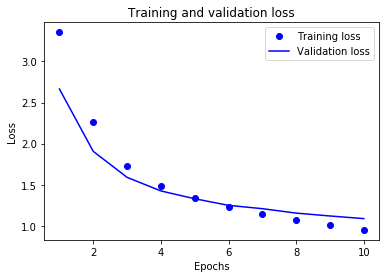

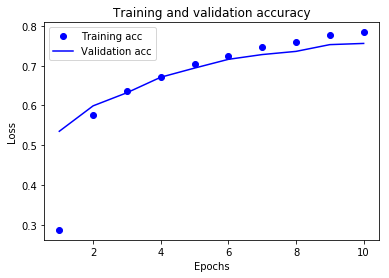

In [109]:
vis_loss(history_32)
vis_acc(history_32)

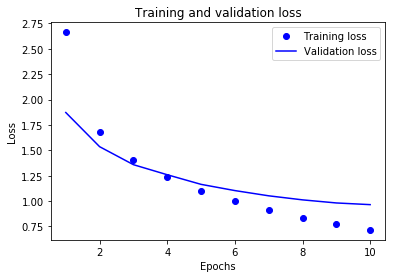

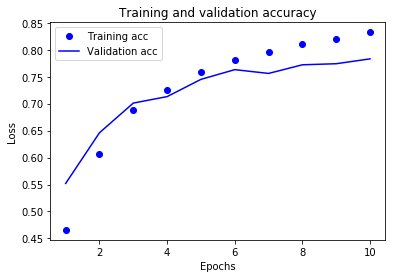

In [110]:
vis_loss(history_64)
vis_acc(history_64)

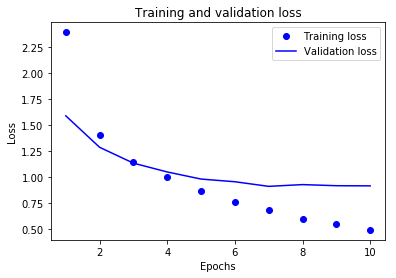

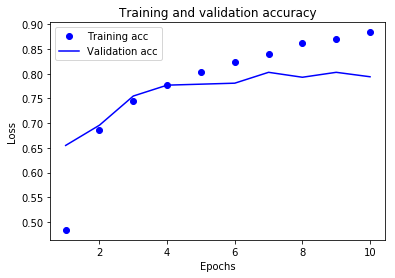

In [111]:
vis_loss(history_128)
vis_acc(history_128)

In [108]:
results_32 = model_32.evaluate(x_test, y_test)
print(results_32)
results_64 = model_64.evaluate(x_test, y_test)
print(results_64)
results_128 = model_128.evaluate(x_test, y_test)
print(results_128)

2246/2246 [==============================] - 0s 62us/step
[1.1460652678329182, 0.7462154942650085]
2246/2246 [==============================] - 0s 59us/step
[1.0147548534991162, 0.757346393588602]
2246/2246 [==============================] - 0s 70us/step
[0.9865963718027062, 0.7693677649419433]


Судя по картинке с точностью, на 128 нейронах мы немного переобучаемся на нашей 10 эпохе, но там как раз у предыдущих двух такой же скачок был, так что есть шанс, что на 11 стало бы всё хорошо. И всё равно модель получилась получше других.

### 2) Меняем количество слоёв

Возьмём 128 нейронов.

In [112]:
model_1 = models.Sequential()
model_1.add(layers.Dense(128, activation='relu', input_shape=(1000,)))
model_1.add(layers.Dense(46, activation='softmax'))

In [122]:
model_2 = models.Sequential()
model_2.add(layers.Dense(128, activation='relu', input_shape=(1000,)))
model_2.add(layers.Dense(128, activation='relu'))
model_2.add(layers.Dense(46, activation='softmax'))

In [120]:
model_3 = models.Sequential()
model_3.add(layers.Dense(128, activation='relu', input_shape=(1000,)))
model_3.add(layers.Dense(128, activation='relu'))
model_3.add(layers.Dense(128, activation='relu'))
model_3.add(layers.Dense(46, activation='softmax'))

In [115]:
model_1.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_1 = model_1.fit(part_x_train,
                    part_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 3s 359us/step - loss: 2.4571 - acc: 0.5356 - val_loss: 1.7173 - val_acc: 0.6430
Epoch 2/10
7982/7982 [==============================] - 1s 64us/step - loss: 1.4893 - acc: 0.6897 - val_loss: 1.3482 - val_acc: 0.6950
Epoch 3/10
7982/7982 [==============================] - 1s 63us/step - loss: 1.1984 - acc: 0.7442 - val_loss: 1.1862 - val_acc: 0.7350
Epoch 4/10
7982/7982 [==============================] - 1s 68us/step - loss: 1.0255 - acc: 0.7809 - val_loss: 1.0854 - val_acc: 0.7620
Epoch 5/10
7982/7982 [==============================] - 1s 63us/step - loss: 0.8996 - acc: 0.8072 - val_loss: 1.0120 - val_acc: 0.7800
Epoch 6/10
7982/7982 [==============================] - 1s 67us/step - loss: 0.7969 - acc: 0.8257 - val_loss: 0.9696 - val_acc: 0.7840
Epoch 7/10
7982/7982 [==============================] - 1s 82us/step - loss: 0.7152 - acc: 0.8435 - val_loss: 0.9351 - val_acc: 0.7900
Epoch 

In [124]:
model_2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_2 = model_2.fit(part_x_train,
                    part_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 2s 221us/step - loss: 2.4336 - acc: 0.4967 - val_loss: 1.6048 - val_acc: 0.6320
Epoch 2/10
7982/7982 [==============================] - 0s 62us/step - loss: 1.4259 - acc: 0.6803 - val_loss: 1.2890 - val_acc: 0.7090
Epoch 3/10
7982/7982 [==============================] - 0s 61us/step - loss: 1.1682 - acc: 0.7417 - val_loss: 1.1593 - val_acc: 0.7410
Epoch 4/10
7982/7982 [==============================] - 1s 75us/step - loss: 0.9884 - acc: 0.7811 - val_loss: 1.0519 - val_acc: 0.7710
Epoch 5/10
7982/7982 [==============================] - 0s 62us/step - loss: 0.8769 - acc: 0.7980 - val_loss: 1.0045 - val_acc: 0.7780
Epoch 6/10
7982/7982 [==============================] - 1s 115us/step - loss: 0.7671 - acc: 0.8217 - val_loss: 0.9544 - val_acc: 0.7850
Epoch 7/10
7982/7982 [==============================] - 1s 92us/step - loss: 0.6822 - acc: 0.8411 - val_loss: 0.9172 - val_acc: 0.7970
Epoch

In [123]:
model_3.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_3 = model_3.fit(part_x_train,
                    part_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 2s 241us/step - loss: 2.3778 - acc: 0.4717 - val_loss: 1.6065 - val_acc: 0.6320
Epoch 2/10
7982/7982 [==============================] - 1s 64us/step - loss: 1.4554 - acc: 0.6701 - val_loss: 1.2921 - val_acc: 0.7030
Epoch 3/10
7982/7982 [==============================] - 1s 66us/step - loss: 1.1997 - acc: 0.7253 - val_loss: 1.1887 - val_acc: 0.7250
Epoch 4/10
7982/7982 [==============================] - 1s 64us/step - loss: 1.0321 - acc: 0.7621 - val_loss: 1.0867 - val_acc: 0.7490
Epoch 5/10
7982/7982 [==============================] - 1s 74us/step - loss: 0.9125 - acc: 0.7895 - val_loss: 1.0245 - val_acc: 0.7600
Epoch 6/10
7982/7982 [==============================] - 0s 62us/step - loss: 0.7973 - acc: 0.8116 - val_loss: 1.0090 - val_acc: 0.7640
Epoch 7/10
7982/7982 [==============================] - 1s 68us/step - loss: 0.7146 - acc: 0.8294 - val_loss: 0.9637 - val_acc: 0.7780
Epoch 

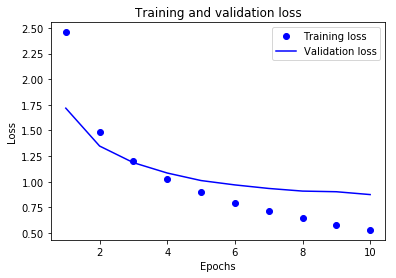

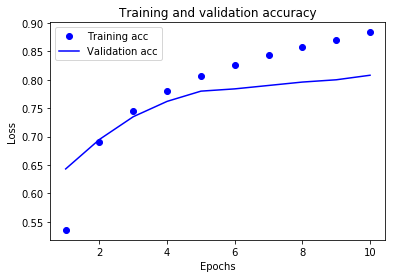

In [125]:
vis_loss(history_1)
vis_acc(history_1)

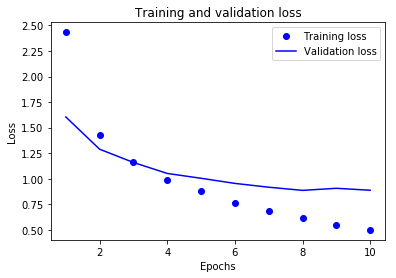

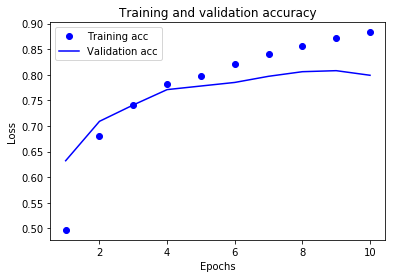

In [126]:
vis_loss(history_2)
vis_acc(history_2)

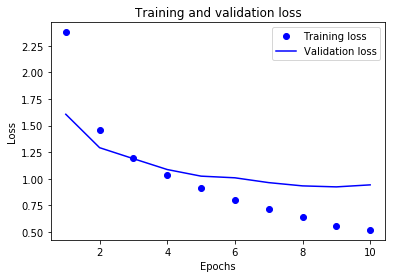

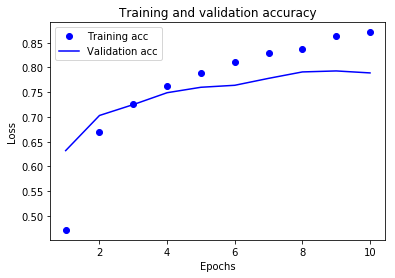

In [127]:
vis_loss(history_3)
vis_acc(history_3)

In [128]:
results_1 = model_1.evaluate(x_test, y_test)
print(results_1)
results_2 = model_2.evaluate(x_test, y_test)
print(results_2)
results_3 = model_3.evaluate(x_test, y_test)
print(results_3)

2246/2246 [==============================] - 1s 456us/step
[0.9235490708083631, 0.7871772039180766]
2246/2246 [==============================] - 0s 125us/step
[0.9556864416185279, 0.7796081923419412]
2246/2246 [==============================] - 0s 186us/step
[1.0537000260815914, 0.7528940338644723]


Очевидно, у нас не настолько сложные данные, чтобы обучать 3 слоя по 128 нейронов, хватит и 1 -- дальше мы явно переобучаемся.